<a href="https://colab.research.google.com/github/sankets139/AI_Engineering/blob/master/NLP_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
up= files.upload()

Saving twitter.csv to twitter.csv


In [ ]:
df=pd.read_csv('twitter.csv')
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


spam 1

not spam 0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [ ]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [ ]:

df.isnull().sum()

,0
id,0
label,0
tweet,0


<Axes: xlabel='label', ylabel='count'>

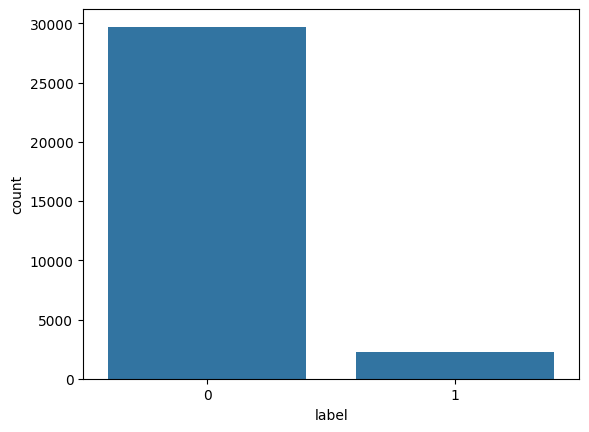

In [ ]:
import seaborn as sns
sns.barplot(data=df['label'].value_counts())

# Text Preprocessing
Checking the length of the tweet

Tokenization - split

In [ ]:
from nltk import word_tokenize
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# A fucntion that tokenizes every tweet into words and finds the length

In [ ]:
# A function that is used for tokenizing and counting words in a tweet
def count_words(tweet):
  words=word_tokenize(tweet) # word_tokenize --> is a function from the NLTK library that breaks a string of text into individual words or tokens.
  return len(words)

# New column 'count' is created

In [ ]:
df['count']=df['tweet'].apply(count_words)

In [ ]:
df['count']

,count
0,21
1,27
2,3
3,18
4,6
...,...
31957,8
31958,26
31959,13
31960,16


In [ ]:
df.head()

,id,label,tweet,count
0,1,0,@user when a father is dysfunctional and is s...,21
1,2,0,@user @user thanks for #lyft credit i can't us...,27
2,3,0,bihday your majesty,3
3,4,0,#model i love u take with u all the time in ...,18
4,5,0,factsguide: society now #motivation,6


In [ ]:
df.columns

Index(['id', 'label', 'tweet', 'count'], dtype='object')

# Stop words, remove punctuations, stemming

In [ ]:
# Remove stopwords
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Remove punctuations
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
# A function that converts to lower case after the removing stop words and punctuations.
def preprocess_text(tweet):
  no_punc=  [char for char in tweet if char not in string.punctuation]
  no_punc=''.join(no_punc)
  words = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
  return ''.join(words)

In [ ]:
# Apply the complete dataset
df['tweet']=df['tweet'].apply(preprocess_text)

In [ ]:
df['tweet'].head()

,tweet
0,userfatherdysfunctionalselfishdragskidsdysfunc...
1,useruserthankslyftcreditcantusecausedontofferw...
2,bihdaymajesty
3,modelloveutakeutimeurð±ððððð¦ð...
4,factsguidesocietymotivation


# Stemming Prpcess

In [ ]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

In [ ]:
def stemming(tweet):
  return ''.join([stemmer.stem(word) for word in tweet])

In [ ]:
df['tweet']=df['tweet'].apply(stemming)

In [ ]:
df.head()

,id,label,tweet,count
0,1,0,userfatherdysfunctionalselfishdragskidsdysfunc...,21
1,2,0,useruserthankslyftcreditcantusecausedontofferw...,27
2,3,0,bihdaymajesty,3
3,4,0,modelloveutakeutimeurð±ððððð¦ð...,18
4,5,0,factsguidesocietymotivation,6


# Count vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
message=vectorizer.fit_transform(df['tweet'])
message.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(message,df['label'],test_size=0.20)


# Model Building and Evaluation

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb=MultinomialNB()
nb.fit(xtrain,ytrain)
ypred=nb.predict(xtest)

In [ ]:
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5959
           1       0.79      0.09      0.16       434

    accuracy                           0.94      6393
   macro avg       0.86      0.54      0.56      6393
weighted avg       0.93      0.94      0.91      6393



In [ ]:
accuracy_score(ytest,ypred)

0.9364930392616925

Model accuracy is 93.6%